<center><h1>Module 2 Assignment</h1></center>

# Choose a dataset

Choose a dataset from [NYC Open Data](https://opendata.cityofnewyork.us/) that is available in CSV format (look at the format labels in the list of datasets). Choose one that has at least 2 numerical value columns and 1 string value column. 

If it's a CSV file you may be able to directly read it with pandas
```
pd.read_csv(url)
```

If it is a compressed file (.zip, .gz, etc.), download the zip and unpack it, then read it in with pandas
```
pd.read_csv(<filename>.csv)
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
data=pd.read_csv("DOF__Summary_of_Neighborhood_Sales_by_Neighborhood_Citywide_by_Borough.csv")

## Display top 7 rows of the dataframe in your notebook

In [2]:
result = data.head(7)
print("top 7 rows of the dataframe")
display(result) # Disini menggunakan display agar tabelnya rapi, kalau menggunakan print(result) kurang rapi

top 7 rows of the dataframe


,BOROUGH,NEIGHBORHOOD,TYPE OF HOME,NUMBER OF SALES,LOWEST SALE PRICE,AVERAGE SALE PRICE,MEDIAN SALE PRICE,HIGHEST SALE PRICE,YEAR
0,MANHATTAN,ALPHABET CITY,01 ONE FAMILY HOMES,1,593362,593362,593362,593362,2010
1,MANHATTAN,ALPHABET CITY,02 TWO FAMILY HOMES,1,1320000,1320000,1320000,1320000,2010
2,MANHATTAN,ALPHABET CITY,03 THREE FAMILY HOMES,1,900000,900000,900000,900000,2010
3,MANHATTAN,CHELSEA,01 ONE FAMILY HOMES,2,500000,2875000,2875000,5250000,2010
4,MANHATTAN,CHELSEA,02 TWO FAMILY HOMES,2,1306213,2603107,2603107,3900000,2010
5,MANHATTAN,CHELSEA,03 THREE FAMILY HOMES,1,6400000,6400000,6400000,6400000,2010
6,MANHATTAN,CLINTON,01 ONE FAMILY HOMES,1,3850000,3850000,3850000,3850000,2010


## Count number of null values (if any) for each column

In [3]:
data.isna().sum()

BOROUGH               0
NEIGHBORHOOD          1
TYPE OF HOME          0
NUMBER OF SALES       0
LOWEST SALE PRICE     0
AVERAGE SALE PRICE    0
MEDIAN SALE PRICE     0
HIGHEST SALE PRICE    0
YEAR                  0
dtype: int64

## Remove all but 2 numerical values columns of your choice and display the reducted dataframe.

In [4]:
data.columns
remove=data.drop([data.columns[0], data.columns[1], data.columns[4], data.columns[6], data.columns[7], data.columns[8]], axis=1)
display(remove) # Disini menggunakan display agar tabelnya rapi, kalau menggunakan print(result) kurang rapi

,TYPE OF HOME,NUMBER OF SALES,AVERAGE SALE PRICE
0,01 ONE FAMILY HOMES,1,593362
1,02 TWO FAMILY HOMES,1,1320000
2,03 THREE FAMILY HOMES,1,900000
3,01 ONE FAMILY HOMES,2,2875000
4,02 TWO FAMILY HOMES,2,2603107
...,...,...,...
6560,01 ONE FAMILY DWELLINGS,74,598064
6561,02 TWO FAMILY DWELLINGS,23,662768
6562,01 ONE FAMILY DWELLINGS,69,582575
6563,02 TWO FAMILY DWELLINGS,46,745061


## Display the average, median, and standard deviation of each of your numerical columns

In [5]:
remove.describe().loc[['mean', 'std', '50%']]

,NUMBER OF SALES,AVERAGE SALE PRICE
mean,35.184615,1.230842e+06
std,50.179313,1.995127e+06
50%,16.000000,6.429380e+05


## Plot two of the numerical columns one against the other in a scatter plot

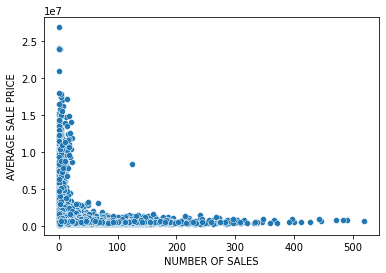

In [6]:
#scatter plot untuk NUMBER OF SALES vs AVERAGE SALES PRICE
sns.scatterplot(x='NUMBER OF SALES', y='AVERAGE SALE PRICE', data=remove);

## Plot the data distribution of all your numerical columns in histogram and boxplot

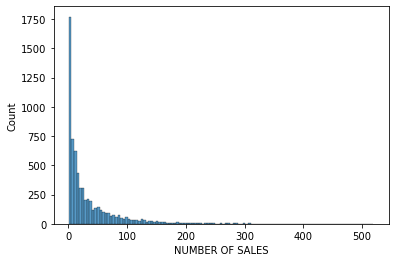

In [7]:
#Histogram untuk NUMBER OF SALES
sns.histplot(data=remove, x="NUMBER OF SALES");

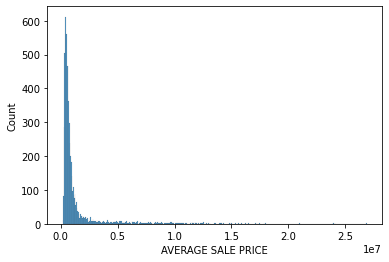

In [8]:
#Histogram untuk AVERAGE SALE PRICE
sns.histplot(data=remove, x="AVERAGE SALE PRICE");

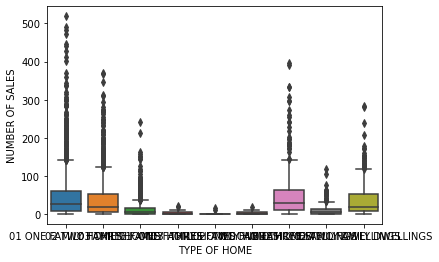

In [9]:
#Boxplot untuk NUMBER OF SALES
sns.boxplot(x='TYPE OF HOME', y='NUMBER OF SALES', data=remove);

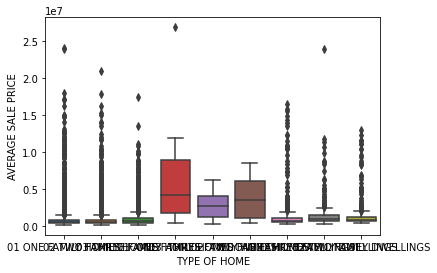

In [10]:
#Boxplot untuk AVERAGE SALE PRICE
sns.boxplot(x='TYPE OF HOME', y='AVERAGE SALE PRICE', data=remove);

## Create a new column in the same dataframe that is raised power of two of an existing column
Example:
![power_of_two](images/ex1.jpeg)


In [11]:
remove.assign(Raised_power_value=lambda x: x['AVERAGE SALE PRICE']**2)

,TYPE OF HOME,NUMBER OF SALES,AVERAGE SALE PRICE,Raised_power_value
0,01 ONE FAMILY HOMES,1,593362,352078463044
1,02 TWO FAMILY HOMES,1,1320000,1742400000000
2,03 THREE FAMILY HOMES,1,900000,810000000000
3,01 ONE FAMILY HOMES,2,2875000,8265625000000
4,02 TWO FAMILY HOMES,2,2603107,6776166053449
...,...,...,...,...
6560,01 ONE FAMILY DWELLINGS,74,598064,357680548096
6561,02 TWO FAMILY DWELLINGS,23,662768,439261421824
6562,01 ONE FAMILY DWELLINGS,69,582575,339393630625
6563,02 TWO FAMILY DWELLINGS,46,745061,555115893721


# Citi Bike investigation
![citi-bike](images/citibike.jpeg)
>Citi Bike is the largest bike share program in the US, with 20,000 bikes and over 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Choose a citibikes dataset (one or two months, earlier datasets are convenient because they are smaller)

Example for downloading September 2017 Citibike data:
```
! month=201709
! curl https://s3.amazonaws.com/tripdata/$month-citibike-tripdata.csv.zip >> $month-citibike-tripdata.csv.zip
! unzip $month-citibike-tripdata.csv.zip
```

In [44]:
import datetime as dt
import calendar

sepeda=pd.read_csv("JC-202011-citibike-tripdata.csv")

## Count the number of missing values of each column

In [13]:
sepeda.isna().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

## Who rides citibikes? Show ridership distribution by gender, user type, and age
Process the data and plot your answers

In [14]:
sepeda['age']=2021-sepeda['birth year'] #pake 2021 karena data yang diambil tahun 2021

sepeda[['gender','usertype', 'age']]

,gender,usertype,age
0,1,Subscriber,37
1,0,Customer,52
2,1,Subscriber,41
3,0,Customer,52
4,1,Subscriber,35
...,...,...,...
21270,2,Subscriber,25
21271,1,Subscriber,22
21272,1,Subscriber,30
21273,1,Customer,31


## What is the average number of trips per day?

In [15]:
d0 = 2020-11-1
d1 = 2020-11-30

delta=d0-d1
average=21275/delta
print('rata-rata jumlah perjalanan perhari adalah ')
print(average)

rata-rata jumlah perjalanan perhari adalah 
733.6206896551724


## What is the average trip duration?

In [46]:
sepeda.tripduration.describe().loc[['mean']]

mean    1398.394031
Name: tripduration, dtype: float64

## What days of the week are most rides taken on?
Process the data and plot your answer

<BarContainer object of 7 artists>

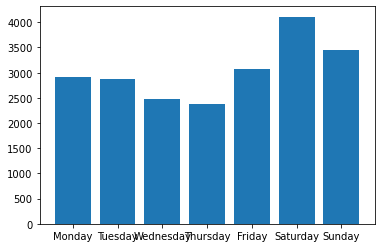

In [17]:
sepeda['starttime'] = pd.to_datetime(sepeda.starttime) #mengubah tipe data starttime menjadi datetime
sepeda['stoptime'] = pd.to_datetime(sepeda.stoptime) #mengubah tipe data stoptime menjadi datetime

sepeda['hari_mulai'] = sepeda['starttime'].dt.weekday.astype('category')
plt.bar(list(calendar.day_name),
       list(sepeda.groupby('hari_mulai').size()))

# Kesimpulan: Sabtu merupakan hari yang paling sering digunakan untuk mengendarai sepeda

## What hour of the day are most rides taken on?
Process the data and plot your answer

In [29]:
sepeda['jam_mulai']=sepeda['starttime'].dt.hour
jumlah_jam=sepeda.groupby(['jam_mulai']).size().to_frame().rename(columns = {0:'jumlah'})
display(jumlah_jam)

,jumlah
jam_mulai,
0,201
1,95
2,50
3,28
4,58
5,151
6,486
7,713
8,1007


## Kesimpulan: Jam yang paling banyak digunakan adalah pada pukul 15 dengan 1855 pengendara

## Is there correlation between age and trip duration?

In [43]:
jumlah=sepeda.groupby(['age']).sum()

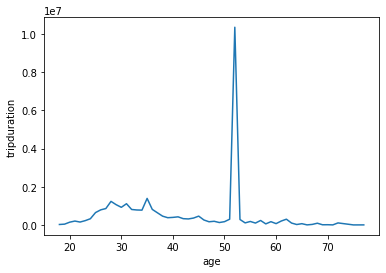

In [32]:
sns.lineplot(data=jumlah, x="age", y="tripduration");

# Kesimpulan: Tidak ada korelasi antara age dan tripduration

## What are the top 10 pair of stations that our riders use as a start & stopping point?

In [42]:
stations =sepeda.groupby(['start station name', 'end station name']).size().to_frame().sort_values(0, ascending = False).head(10)
display(stations)

,,0
start station name,end station name,
Liberty Light Rail,Liberty Light Rail,358
Newport Pkwy,Newport Pkwy,268
Marin Light Rail,Marin Light Rail,192
JC Medical Center,JC Medical Center,191
McGinley Square,Sip Ave,159
Sip Ave,McGinley Square,134
Grove St PATH,Liberty Light Rail,128
Liberty Light Rail,Grove St PATH,121
Marin Light Rail,Grove St PATH,119


## Come up with your own question on the Citibike data usage and formulate a hypothesis

### Example:
### "Women are less likely than men to choose biking for commuting."
>
>Null Hypothesis: 

>The proportion of men biking on weekends is the same or higher than the proportion of women biking on weekends



## Work with your dataset and show your findings to help answer your question

# Submit Instructions
Rename this notebook to `mod2_<first_name>_<last_name>.ipynb` and push this to your branch in module-2 repository

```
git checkout -b tanyani
git add mod2_tanya_nabila.ipynb
git commit -m 'submit mod2 assignment for Tanya Nabila'
git push
```